## Alejandro Pulido Sánchez

# PRÁCTICA 11: RBF Y SVM

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score as ac
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.svm import SVC
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import pandas as pd
from scipy.spatial.distance import cdist

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
data = load_breast_cancer()

In [44]:
#X = MinMaxScaler().fit_transform(data.data) #Quitar el scaler
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [45]:
K=10
skf = StratifiedKFold(n_splits=K)

<div class="alert alert-block alert-success">
    
<b>for a, k in tqdm(enumerate(range(2, 31, 1)), total=29, unit="n_clusters" ):</b>  Este es el bucle principal que itera sobre una secuencia de valores de 'k' desde 2 hasta 30 (ambos incluidos). El valor de 'k' se asigna a la variable 'k' en cada iteración.

<b>for train_index, test_index in skf.split(X,y):</b>  Aquí se realiza otro bucle utilizando una función 'split' que divide los datos en conjuntos de entrenamiento y verificación. Los índices de los conjuntos de entrenamiento y verificación se asignan a las variables 'train_index' y 'test_index' respectivamente en cada iteración.

<b>kmedias = KMeans(n_clusters=k):</b>  Se crea una instancia del algoritmo K-means con el valor actual de 'k' como número de clusters.

<b>X_train, X_test = X[train_index], X[test_index] y y_train, y_test = y[train_index], y[test_index]:</b>  Se dividen los datos 'X' y las etiquetas 'y' en conjuntos de entrenamiento y verificación, utilizando los índices obtenidos anteriormente.

<b>kmedias.fit(X_train):</b>  Se ajusta el modelo de K-means utilizando los datos de entrenamiento.

<b>label_training = kmedias.labels_:</b>  Se obtienen las etiquetas asignadas por K-means a los datos de entrenamiento.

<b>label_cluster = np.zeros((k,), dtype=int) - 1:</b>  Se crea un array de ceros de longitud 'k' y tipo entero. Se inicializa con el valor -1 en todas las posiciones.

<b>label_cluster[i] = np.array(mode(y_train[np.argwhere(label_training == i)]))[0].astype(int):</b>  Aquí se asigna a 'label_cluster[i]' la etiqueta más frecuente en 'y_train' para los datos de entrenamiento que están asignados al cluster 'i' por K-means.

<b>aciertos_entrena += ac(label_cluster[label_training], y_train):</b>  Se calculan los aciertos en el conjunto de entrenamiento comparando las etiquetas asignadas por 'label_cluster' con las etiquetas verdaderas 'y_train'. El resultado se acumula en la variable 'aciertos_entrena'.

<b>aciertos_verifica += ac(label_cluster[kmedias.predict(X_test)], y_test):</b>  Se calculan los aciertos en el conjunto de verificación comparando las etiquetas asignadas por 'label_cluster' a los datos de prueba con las etiquetas verdaderas 'y_test'. El resultado se acumula en la variable 'aciertos_verifica'.

<b>r_centros.loc[a] = [k, aciertos_entrena/K, aciertos_verifica/K]:</b>  Los resultados de cada iteración se agregan al DataFrame 'r_centros' en la fila 'a'. Se almacenan el valor de 'k', los aciertos promedio en el conjunto de entrenamiento ('aciertos_entrena/K') y los aciertos promedio en el conjunto de verificación ('aciertos_verifica/K').

In [46]:
inicial = time.time()
r_centros = pd.DataFrame(columns=['No.Centros', 'Aciertos Entrena', 'Aciertos Verifica'])
for a, k in tqdm(enumerate(range(2, 31, 1)), total=29, unit="n_clusters" ):
    aciertos_entrena = 0.0
    aciertos_verifica = 0.0
    
    for train_index, test_index in skf.split(X,y):
        kmedias = KMeans(n_clusters=k)
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        kmedias.fit(X_train)
        label_training = kmedias.labels_
        label_cluster = np.zeros((k,), dtype=int) - 1
        for i in range(k):
            label_cluster[i] = np.array(mode(y_train[np.argwhere(label_training == i)]))[0].astype(int)
        aciertos_entrena += ac(label_cluster[label_training], y_train)
        aciertos_verifica += ac(label_cluster[kmedias.predict(X_test)], y_test)
    r_centros.loc[a] = [k, aciertos_entrena/K, aciertos_verifica/K]
elapsed_time = time.time() - inicial
print("Tiempo = ", elapsed_time, " sec.")



100%|███████████████████████████████████████████████████████████████████████████| 29/29 [05:39<00:00, 11.72s/n_clusters]

Tiempo =  339.77467155456543  sec.


In [47]:
r_centros

,No.Centros,Aciertos Entrena,Aciertos Verifica
0,2.0,0.852568,0.850627
1,3.0,0.875611,0.869987
2,4.0,0.843587,0.824311
3,5.0,0.880300,0.885777
4,6.0,0.896698,0.891134
5,7.0,0.881860,0.887594
6,8.0,0.886156,0.878759
7,9.0,0.902949,0.899906
8,10.0,0.904121,0.903415
9,11.0,0.907443,0.905075


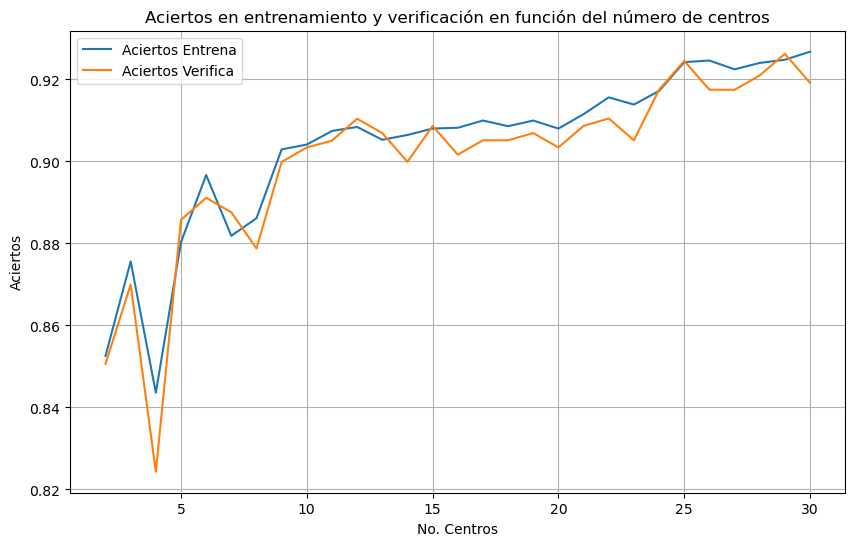

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(r_centros['No.Centros'], r_centros['Aciertos Entrena'], label='Aciertos Entrena')
plt.plot(r_centros['No.Centros'], r_centros['Aciertos Verifica'], label='Aciertos Verifica')
plt.xlabel('No. Centros')
plt.ylabel('Aciertos')
plt.title('Aciertos en entrenamiento y verificación en función del número de centros')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
optimal_cluster = np.argmax(r_centros['Aciertos Verifica'])+2

print("\n\033[1mLa mayor tasa de acierto la obtenemos con",optimal_cluster,"clusters \033[0m(%.4f)" %r_centros['Aciertos Verifica'].max())


La mayor tasa de acierto la obtenemos con 29 clusters (0.9263)


<div class="alert alert-block alert-success">
<b>kmedias = KMeans(n_clusters=optimal_cluster):</b> Se crea una instancia del modelo K-means con el número de clusters óptimo ('optimal_cluster') determinado previamente.

<b>kmedias.fit(X):</b> Se ajusta el modelo K-means a los datos 'X'.

<b>centros = kmedias.cluster_centers_:</b> Se obtienen los centroides de los clusters encontrados por K-means. Estos centroides representan las posiciones en el espacio de características.

<b>distancias = euclidean_distances(centros):</b> Se calcula la matriz de distancias euclidianas entre los centroides. La función 'euclidean_distances' calcula todas las distancias entre pares de puntos en 'centros'.

<b>sigma = np.sum(distancias, axis=0)/(centros.shape[0]-1):</b> Se calcula el valor de sigma, que se utiliza como una medida de escala para el cálculo de las características transformadas. Aquí, se suma la matriz de distancias a lo largo del eje 0 (columnas) y se divide por 'centros.shape[0]-1' para obtener el promedio.

<b>X_svm = np.exp(-cdist(X, kmedias.cluster_centers_)**2/(2*(sigma**2))):</b> Se utiliza para calcular una matriz de características utilizando la distancia euclidiana y una función exponencial, donde X es la matriz de datos de entrada, kmedias.cluster_centers_ son los centros de los clusters obtenidos a través del algoritmo de k-medias, y sigma es un parámetro que controla la normalización.El resultado se asigna a 'X_svm'.

<b>X_svm.shape:</b> Se obtiene la forma de 'X_svm', que indica el número de muestras y el número de características en el espacio de características transformado.

In [50]:
kmedias = KMeans(n_clusters=optimal_cluster)
kmedias.fit(X)
centros = kmedias.cluster_centers_
distancias = euclidean_distances(centros)
sigma = np.sum(distancias, axis=0)/(centros.shape[0]-1)
X_svm = np.exp(-cdist(X, kmedias.cluster_centers_)**2/(2*(sigma**2)))
X_svm.shape

(569, 29)

<div class="alert alert-block alert-success">
En este fragmento de código, se realiza un bucle para ajustar y evaluar un clasificador SVM con diferentes grados polinomiales utilizando los datos transformados 'X_svm'. Veamos línea por línea:

<b>accuracy_per_degree = pd.DataFrame(columns=['Grado Polinomial', 'Tasa de Acierto']):</b> Se crea un DataFrame vacío llamado 'accuracy_per_degree' con dos columnas: 'Grado Polinomial' y 'Tasa de Acierto'. Este DataFrame se utilizará para almacenar los resultados de las tasas de acierto obtenidas en cada iteración del bucle.

<b>for k, g in enumerate(range(2,10)):</b>Este bucle itera sobre una secuencia de valores de 'g' desde 2 hasta 9 (ambos incluidos). El valor de 'g' se asigna a la variable 'g' en cada iteración, y el índice de iteración se asigna a la variable 'k'.

<b>accuracy_svm = []:</b> Se crea una lista vacía llamada 'accuracy_svm' para almacenar las tasas de acierto obtenidas en cada iteración interna.

<b>for train_index, test_index in skf.split(X_svm,y):</b> Otro bucle se utiliza para dividir los datos transformados 'X_svm' y las etiquetas 'y' en conjuntos de entrenamiento y verificación. Los índices de los conjuntos se asignan a las variables 'train_index' y 'test_index' respectivamente en cada iteración.

<b>svm = SVC(kernel='poly', degree = g, verbose=False):</b> Se crea una instancia del clasificador SVM con un kernel polinomial y el grado polinomial 'g'. El parámetro 'verbose' se establece en False para evitar mensajes de registro.

<b>svm.fit(X_svm[train_index], y[train_index]):</b> Se ajusta el clasificador SVM utilizando los datos de entrenamiento transformados.

<b>accuracy_svm.append(svm.score(X_svm[test_index], y[test_index])):</b> Se calcula y se agrega a la lista 'accuracy_svm' la tasa de acierto del clasificador SVM en los datos de verificación transformados.

<b>aciertos = np.mean(np.array(accuracy_svm)):</b> Se calcula la media de las tasas de acierto obtenidas en las iteraciones internas utilizando la función 'mean' de NumPy.

<b>print("Grado:", g,"\t", aciertos):</b> Se imprime en pantalla el grado polinomial actual y la tasa de acierto promedio correspondiente.

<b>accuracy_per_degree.loc[k] = [g, aciertos]:</b> Se agrega una nueva fila al DataFrame 'accuracy_per_degree' con el grado polinomial 'g' y la tasa de acierto promedio 'aciertos'.

In [51]:
accuracy_per_degree = pd.DataFrame(columns=['Grado Polinomial', 'Tasa de Acierto'])

for k, g in enumerate(range(2,10)):
    accuracy_svm = []
    for train_index, test_index in skf.split(X_svm,y):
        svm = SVC(kernel='poly', degree = g, verbose=False)
        svm.fit(X_svm[train_index], y[train_index])
        accuracy_svm.append(svm.score(X_svm[test_index], y[test_index]))
    aciertos = np.mean(np.array(accuracy_svm))
    print("Grado:", g,"\t", aciertos)
    accuracy_per_degree.loc[k] = [g, aciertos]

Grado: 2 	 0.9104323308270675
Grado: 3 	 0.9174498746867167
Grado: 4 	 0.9174498746867167
Grado: 5 	 0.9227130325814537
Grado: 6 	 0.9209273182957395
Grado: 7 	 0.9191416040100252
Grado: 8 	 0.9261591478696742
Grado: 9 	 0.9244987468671679


In [52]:
accuracy_per_degree

,Grado Polinomial,Tasa de Acierto
0,2.0,0.910432
1,3.0,0.917450
2,4.0,0.917450
3,5.0,0.922713
4,6.0,0.920927
5,7.0,0.919142
6,8.0,0.926159
7,9.0,0.924499


In [53]:
optimal_degree = np.argmax(accuracy_per_degree["Tasa de Acierto"])+2  

print("\n\033[1mLa mayor tasa de acierto la obtenemos con un kernel polinómico de grado",optimal_degree,"\033[0m(%.4f)" %accuracy_per_degree['Tasa de Acierto'].max())



La mayor tasa de acierto la obtenemos con un kernel polinómico de grado 8 (0.9262)
